# Pneumonia Detection 

## Project Overview 
This project involves building a convolutional neural network (CNN) to classify medical X-ray images and detect pneumonia. Targeted at beginner to intermediate-level data scientists, the project will focus on leveraging deep learning techniques to develop a robust classification model. The final model will be deployed using Streamlit, providing a user-friendly interface for real-time predictions.

### Import Libraries

In [50]:
import numpy as np 
from PIL import Image
import random as rand
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

In [38]:
# What version of tensorflow are we working with? 
tf.__version__

'2.18.0'

## Week 2: Data Preprocessing

### Number of images BEFORE removing from folder for corruption 

In [ ]:
# How many images are we dealing with? 
for folder_name in ('NORMAL', 'PNEUMONIA'):
    folder_path = os.path.join('../../data/chest_xray/train', folder_name)
    image_list = os.listdir(folder_path)
    if (folder_name == 'NORMAL'): 
        print(f'NORMAL IMAGE COUNT TRAIN SET: {len(image_list)}')
    else: 
        print(f'PNEUMONIA IMAGE COUNT TRAIN SET: {len(image_list)}')

NORMAL IMAGE COUNT TRAIN SET: 1341
PNEUMONIA IMAGE COUNT TRAIN SET: 3875


### Filter out corrupted images (if any)

In [25]:
num_skipped = 0
# Delete images based on not having JFIF in header
for folder_name in ('NORMAL', 'PNEUMONIA'):
    folder_path = os.path.join('../../data/chest_xray/train', folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = b"JFIF" in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print(f"Deleted {num_skipped} images.")

Deleted 173 images.


### Visualize the images 

In [27]:
# How many images are we dealing with? 
for folder_name in ('NORMAL', 'PNEUMONIA'):
    folder_path = os.path.join('../../data/chest_xray/train', folder_name)
    image_list = os.listdir(folder_path)
    if (folder_name == 'NORMAL'): 
        print(f'NORMAL IMAGE COUNT TRAIN SET: {len(image_list)}')
    else: 
        print(f'PNEUMONIA IMAGE COUNT TRAIN SET: {len(image_list)}')

NORMAL IMAGE COUNT TRAIN SET: 1300
PNEUMONIA IMAGE COUNT TRAIN SET: 3743


In [70]:
def display_image_from_path(image_path):
    """Displays an image from a specified folder path."""
    if not os.path.exists(image_path):
        print(f"Error: The file at '{image_path}' does not exist.")
        return
    
    image_name = os.path.basename(image_path) # Extract filename 
    image = Image.open(image_path)  # Open image
    plt.imshow(image)
    plt.title(image_name) # Set filename as title
    #plt.axis('off')  # Hide axis for better visualization
    plt.show()

In [63]:
normal_fpath = []
pneumonia_fpath = []

for folder_name in ('NORMAL', 'PNEUMONIA'):
    folder_path = os.path.join('../../data/chest_xray/train', folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        if (folder_name == 'NORMAL'): 
            normal_fpath.append(fpath)
        else: 
            pneumonia_fpath.append(fpath)

In [64]:
print('NORMAL IMAGE PATH TRAIN SET')
print(normal_fpath)
print(len(normal_fpath))
print('\n')
print('PNEUMONIA IMAGE PATH TRAIN SET')
print(pneumonia_fpath)
print(len(pneumonia_fpath))

NORMAL IMAGE PATH TRAIN SET
['../../data/chest_xray/train\\NORMAL\\IM-0115-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0117-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0119-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0122-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0125-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0127-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0128-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0129-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0131-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0133-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0135-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0137-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0140-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0141-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0143-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-0145-0001.jpeg', '../../data/chest_xray/train\\NORMAL\\IM-01

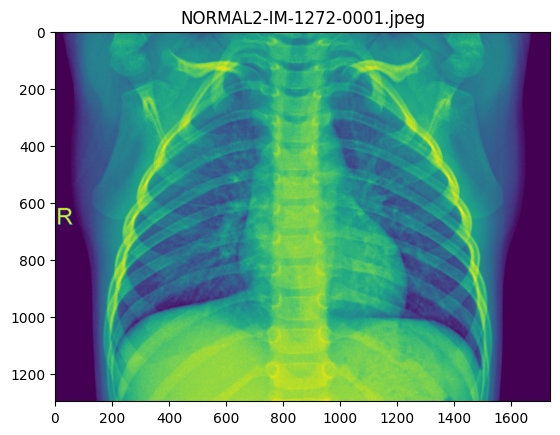

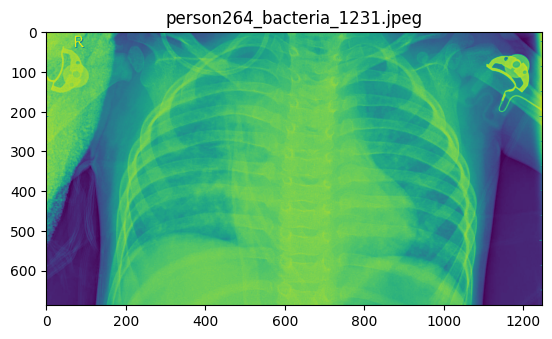

In [75]:
normal_rand_num = rand.randint(0, len(normal_fpath) - 1)
pneumonia_rand_num = rand.randint(0,len(pneumonia_fpath) - 1)

display_image_from_path(normal_fpath[normal_rand_num])
display_image_from_path(pneumonia_fpath[pneumonia_rand_num])
